### Datamining da base de dados Serviçosxis.db

Carrega abase e manipula dados para entendimento do conteúdo

Carlos Ramires
26/10/2023


In [58]:
import sqlite3
import pandas as pd

# Carrega a tabela servicos da base servicosxis.db para um dataframe

# Cria a conexão
cnx = sqlite3.connect('servicosxis.db')

# carrega tabela servicos em df
df = pd.read_sql_query("SELECT * FROM serv_campo", cnx)

cnx.close()

In [24]:
#Extrai qtd serviços de cada unidade

unidades = ['ALG','NGA', 'PMJ', 'CPE', 'SDN', 'RBH', 'NAA']
#unidades = 'ALG'


mensal = {'Unidade':[],
          'Topico':[],
          'Topico_Codigo':[],
          'Ano_Mes':[]
         }

resumo = {'Topico':[],
         'Total':[],
         'Unidade':[]}

mensal_df = pd.DataFrame(mensal)
resumo_df = pd.DataFrame(resumo)

for unidade in unidades:
    # criar a df da unidade
    df_unidade = df['Unidade'] == unidade
    df_unidade = df[df_unidade].copy()
    # Cria coluna Ano_Mes para consolidação mensal
    df_unidade['Encerramento_DataHora'] = pd.to_datetime(df_unidade['Encerramento_DataHora'])        # cria uma coluna no Ano_Mes no df unidade
    df_unidade['Ano_Mes'] = df_unidade['Encerramento_DataHora'].dt.to_period('M')
    # Reduz a df_unidade às colunas desejadas
    df_unidade = df_unidade[['Unidade','Topico', 'Topico_Codigo', 'Ano_Mes']]
    
    # muda 'Ano_Mes para DataHora'
    df_unidade['Ano_Mes'] = df_unidade['Ano_Mes'].dt.strftime('%Y-%m')
    
    # cria a df mensal_df com todas as unidades
    mensal_df = pd.concat([mensal_df, df_unidade], ignore_index=True)
    
    
        
    #conta o número de tópicos da unidade criando uma lista Pandas
    qtd = df_unidade['Topico'].value_counts()
    
    # converte a série Pandas qtd em um df
    qtd_df = pd.DataFrame({'Topico': qtd.index, 'Total': qtd.values})
    
    #inclui a coluna Unidade
    qtd_df['Unidade']  = unidade    
    
    
    
    # Concatena a  resumo_df com todas as unidades
    resumo_df = pd.concat([resumo_df, qtd_df], ignore_index=True)
    
#     #converte a série pandas qtd gerada com o value_counts() em lista do seu indice(Topico)
#     l_qtd = qtd.index.tolist()


display(resumo_df)  



,Topico,Total,Unidade
0,(VisitaTécnica) Visita Técnica,12438.0,ALG
1,(Instalação) proceder Instalação,10418.0,ALG
2,(RetiradaEquip) Retirada de equipamento,7295.0,ALG
3,(Inst. Mud Ender) Instalação - Mudança de Ende...,1286.0,ALG
4,(Reagenda Inst) Reagendamento Instalação,114.0,ALG
5,(RetirSuspTemp) Retirada de Suspensão Temporária,60.0,ALG
6,(VisitaTécnica) Visita Técnica,9325.0,NGA
7,(Instalação) proceder Instalação,6190.0,NGA
8,(RetiradaEquip) Retirada de equipamento,3882.0,NGA
9,(Inst. Mud Ender) Instalação - Mudança de Ende...,830.0,NGA


In [39]:
# contar o número de cada Tópico por unidade por mes


mes_df = mensal_df.groupby(['Ano_Mes', 'Unidade'])['Topico'].value_counts().reset_index(name='Total')

display(mes_df)




,Ano_Mes,Unidade,Topico,Total
0,2019-11,ALG,(Instalação) proceder Instalação,8
1,2019-11,ALG,(RetiradaEquip) Retirada de equipamento,3
2,2019-12,ALG,(Instalação) proceder Instalação,209
3,2019-12,ALG,(RetiradaEquip) Retirada de equipamento,22
4,2019-12,ALG,(VisitaTécnica) Visita Técnica,4
...,...,...,...,...
921,2023-07,RBH,(VisitaTécnica) Visita Técnica,20
922,2023-07,RBH,(RetiradaEquip) Retirada de equipamento,13
923,2023-07,RBH,(Instalação) proceder Instalação,12
924,2023-07,RBH,(Inst. Mud Ender) Instalação - Mudança de Ende...,2


In [59]:
display(df)

,Unidade,Numero,Protocolo,Abertura_DataHora,Topico,Topico_Codigo,Encerramento_DataHora,Causa,Fluxo,Usuario_Designado,Encerramento_Usuario,Encerramento_Data,Encerramento_Hora,Duracao
0,NGA,6,2020000000000001,2020-03-25 10:22:17,(Instalação) proceder Instalação,12,2020-03-26 10:15:16,(Instalação OK) Instalação Realizada,NOVA VENDA,carlos.augusto,carlos.augusto,2020-03-26,10:15:16,593.0
1,NGA,8,2020000000000003,2020-03-25 10:42:42,(Instalação) proceder Instalação,12,2020-03-26 10:15:16,(Instalação OK) Instalação Realizada,NOVA VENDA,alessandro.pereira,alessandro.pereira,2020-03-26,10:15:16,573.0
2,NGA,18,2020000000000015,2020-03-26 11:27:28,(Instalação) proceder Instalação,12,2020-03-27 08:59:58,(Instalação OK) Instalação Realizada,NOVA VENDA,alessandro.pereira,alessandro.pereira,2020-03-27,08:59:58,452.0
3,NGA,21,2020000000000020,2020-03-26 14:45:26,(Inst. Mud Ender) Instalação - Mudança de Ende...,79,2020-03-26 14:53:09,(Instalação OK) Instalação Realizada,MUDANÇA DE ENDEREÇO,victor.rosa,victor.rosa,2020-03-26,14:53:09,8.0
4,NGA,31,2020000000000025,2020-03-26 16:00:08,(Instalação) proceder Instalação,12,2020-03-26 19:59:24,(Instalação OK) Instalação Realizada,NOVA VENDA,carlos.augusto,carlos.augusto,2020-03-26,19:59:24,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67069,NAA,7342,2023000000007342,2023-07-26 00:03:03,(RetiradaEquip) Retirada de equipamento,33,2023-07-26 16:32:58,(Equip Não Retir) Equipamento Não Retirado Cli...,RETIRADA DE EQUIPAMENTO,michael.cruz,michael.cruz,2023-07-26,16:32:58,0.0
67070,NAA,7349,2023000000007344,2023-07-27 08:48:12,(VisitaTécnica) Visita Técnica,42,2023-07-27 08:52:32,(Desistência) Cliente Desistiu da Solicitação,REMANEJAMENTO DE EQUIPAMENTO,michael.cruz,michael.cruz,2023-07-27,08:52:32,4.0
67071,NAA,7355,2023000000007354,2023-07-28 14:30:12,(Inst. Mud Ender) Instalação - Mudança de Ende...,46,2023-07-28 14:47:07,(Instalação OK) Instalação Realizada,MUDANÇA DE ENDEREÇO,michael.cruz,michael.cruz,2023-07-28,14:47:07,17.0
67072,NAA,7357,2023000000007346,2023-07-29 07:25:55,(Inst. Mud Ender) Instalação - Mudança de Ende...,46,2023-07-29 07:48:01,(Instalação OK) Instalação Realizada,MUDANÇA DE ENDEREÇO,michael.cruz,michael.cruz,2023-07-29,07:48:01,0.0


In [41]:
#Criar Tabela na base com os dados do df qtd_servicos

# # muda 'Ano_Mes para DataHora'
# mes_df['Ano_Mes'] = mes_df['Ano_Mes'].dt.strftime('%Y-%m')

# conectar a base
cnx = sqlite3.connect('servicosxis.db')

#Criando a tabela da unidade

tabela = ('servicos_mes')

mes_df.to_sql(tabela, cnx, if_exists='replace', index=True)

cnx.close()


In [44]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Suponha que você tenha seu DataFrame 'mes_df'
# Certifique-se de que você já configurou seu aplicativo Dash

app = dash.Dash(__name__)

# Layout do aplicativo
app.layout = html.Div([
    html.H1("Gráfico de Linha"),
    html.Label("Selecione Unidade:"),
    dcc.Dropdown(
        id='unidade-dropdown',
        options=[{'label': unidade, 'value': unidade} for unidade in mes_df['Unidade'].unique()],
        value=mes_df['Unidade'].unique()[0]  # Valor padrão
    ),
    html.Label("Selecione Topico:"),
    dcc.Dropdown(
        id='topico-dropdown',
        options=[{'label': topico, 'value': topico} for topico in mes_df['Topico'].unique()],
        value=mes_df['Topico'].unique()[0]  # Valor padrão
    ),
    dcc.Graph(id='line-plot')
])

# Callback para atualizar o gráfico com base nas seleções do usuário
@app.callback(
    Output('line-plot', 'figure'),
    Input('unidade-dropdown', 'value'),
    Input('topico-dropdown', 'value')
)
def update_line_plot(selected_unidade, selected_topico):
    filtered_df = mes_df[(mes_df['Unidade'] == selected_unidade) & (mes_df['Topico'] == selected_topico)]
    fig = px.line(filtered_df, x='Ano_Mes', y='Total', title=f'Evolução do Total para {selected_unidade} - {selected_topico}')
    return fig

if __name__ == '__main__':
     app.run(debug=True, port=8080)

In [27]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd

#
# Visualizar em http://127.0.0.1:8080/

app = Dash(__name__)
 # Monta o dropdown com a coluna country
app.layout = html.Div([
    html.H1(children='Serviços por Unidade', style={'textAlign':'center'}),
    dcc.Dropdown(resumo_df.Unidade.unique(), 'ALG', id='dropdown-selection'),
    dcc.Graph(id='graph-content')
])

@callback(
    Output('graph-content', 'figure'),
    Input('dropdown-selection', 'value')
)
# Define os eixos x e y
def update_graph(value):
    dff = resumo_df[resumo_df.Unidade==value]
    return px.bar(dff, x='Total', y='Topico')

if __name__ == '__main__':
    app.run(debug=True, port=8080)

In [7]:
display(df_unidade)

,Unidade,Numero,Protocolo,Abertura_DataHora,Topico,Topico_Codigo,Encerramento_DataHora,Causa,Fluxo,Usuario_Designado,Encerramento_Usuario,Encerramento_Data,Encerramento_Hora,Duracao,Ano_Mes
20378,ALG,99,2019000000000092,2019-11-21 15:18:29,(Instalação) proceder Instalação,12,2019-12-07 17:34:15,(Desistência) Cliente Desistiu da Solicitação,NOVA VENDA,gutemberg.cunha,vanusa.andrade,2019-12-07,17:34:15,0.0,2019-12
20379,ALG,106,2019000000000100,2019-11-21 16:40:29,(Instalação) proceder Instalação,12,2019-11-21 19:37:31,(Instalação OK) Instalação Realizada,NOVA VENDA,gutemberg.cunha,amauri,2019-11-21,19:37:31,0.0,2019-11
20380,ALG,122,2019000000000122,2019-11-21 18:59:33,(RetiradaEquip) Retirada de equipamento,3,2019-11-21 19:07:06,(Equip Retirado) Equipamento Retirado,RETIRADA DE EQUIPAMENTO,amauri,amauri,2019-11-21,19:07:06,8.0,2019-11
20381,ALG,125,2019000000000125,2019-11-21 19:21:21,(RetiradaEquip) Retirada de equipamento,3,2019-11-21 19:27:37,(Equip Não Retir) Equipamento Não Retirado Cli...,RETIRADA DE EQUIPAMENTO,amauri,amauri,2019-11-21,19:27:37,6.0,2019-11
20382,ALG,128,2019000000000128,2019-11-21 19:40:42,(RetiradaEquip) Retirada de equipamento,3,2019-11-21 19:51:08,(Equip Retirado) Equipamento Retirado,RETIRADA DE EQUIPAMENTO,amauri,amauri,2019-11-21,19:51:08,11.0,2019-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51984,ALG,215121,2023000000215108,2023-07-31 08:03:29,(VisitaTécnica) Visita Técnica,41,2023-07-31 12:24:37,(RompimentoCabo) Rompimento de Cabo Drop,SOLICITAÇÃO DE REPARO,ricardo.neres,ricardo.neres,2023-07-31,12:24:37,0.0,2023-07
51985,ALG,215123,2023000000215115,2023-07-31 08:04:52,(VisitaTécnica) Visita Técnica,41,2023-07-31 16:23:10,(RompimentoCabo) Rompimento de Cabo Drop,SOLICITAÇÃO DE REPARO,cleiton.oliveira,cleiton.oliveira,2023-07-31,16:23:10,0.0,2023-07
51986,ALG,215128,2023000000215124,2023-07-31 08:58:00,(VisitaTécnica) Visita Técnica,41,2023-07-31 16:19:16,(TrocaSenha) Troca de Senha,SOLICITAÇÃO DE REPARO,cleiton.oliveira,cleiton.oliveira,2023-07-31,16:19:16,0.0,2023-07
51987,ALG,215132,2023000000215130,2023-07-31 09:52:58,(VisitaTécnica) Visita Técnica,41,2023-07-31 12:52:04,(ConectorNOK) Conector Danificado,SOLICITAÇÃO DE REPARO,italo.aires,italo.aires,2023-07-31,12:52:04,0.0,2023-07


In [3]:
#Extrai as equipes de cada unidade

# unidades = ['ALG','NGA', 'PMJ', 'CPE', 'SDN', 'RBH', 'NAA']
unidades = 'ALG'

for unidade in unidades:
    # criar a df da unidade
    df_unidade = df['Unidade'] == unidades
    df_unidade = df[df_unidade].copy()
    df_unidade['Encerramento_DataHora'] = pd.to_datetime(df_unidade['Encerramento_DataHora'])        # cria uma coluna no Ano_Mes no df unidade
    df_unidade['Ano_Mes'] = df_unidade['Encerramento_DataHora'].dt.to_period('M')
    
tecnicos = df_unidade['Usuario_Designado'].value_counts()

#converte a série pandas tecnicos gerada com o value_counts() em lista do seu indice(Tecnicos)
l_tecnicos = tecnicos.index.tolist()

print(l_tecnicos)

# # Converter a série 'tecnicos' em um DataFrame com uma coluna '' e outra 'TotalServicos' 
# tecnicos_df = pd.DataFrame({'Tecnico': tecnicos.index, 'TotalServicos': tecnicos.values})

# unidade = 'ALG'
# tecnicos_df['Unidade']  = unidade

#display(tecnicos_df)  
    

['diego.morais', 'ricardo.neres', 'cleiton.oliveira', 'henrique.costa', 'italo.aires', 'erivaldo.silva', 'douglas.santos', 'aguardando', 'lander.lucas', 'alessandro.almeida', 'lucas.coimbra', 'gleiton.gomes', 'henrique.silva', 'joao.nascimento', 'bruno.barbosa', 'gutemberg.cunha', 'maria.leticia', 'mario.santos', 'cleiton.silva', 'reparo1', 'marcio.silva', 'daiane.rose', 'parceiro1', 'parceiro2', 'carlos.almeida', 'hellen.sousa', 'maria.neves', 'parceiro3', 'gerard.palitot', 'maria.cristina', 'alda.freire', 'valdemiro.rabelo', 'parceiro4', 'michelle.silva', 'marcos.tome', 'kely.pereira', 'wesley.silva', 'alessandro.silva', 'leonardo.correa', 'comfica.jaudilei', 'larissa.carvalho', 'wilson.silva', 'fernando.alencar', 'tadeu.queiroz', 'carlos.oliveira', 'comfica.pedro', 'vanusa.andrade', 'amauri', 'atendimento01', 'zildeanny.fernandes', 'comfica.dioney', 'routerbox', 'rogerio.santana', 'vitoria.galvao', 'dejalma.santos', 'cristiana.silva', 'joelma.matos', 'kimberly.batista', 'leonardo.so

NameError: name 'l_tecnicos' is not defined

In [1]:
#Extrai qtd Tecnico de cada unidade e os totais de serviços por mes

unidades = ['ALG','NGA', 'PMJ', 'CPE', 'SDN', 'RBH', 'NAA']


tec_mes = {'Unidade':[],
          'Topico':[],
          'Usuario_Designado':[],
          'Ano_Mes':[],
          'Total':[]
         }

tec_mes_df = pd.DataFrame(tec_mes)

for unidade in unidades:
    # criar a df da unidade
    df_unidade = df['Unidade'] == unidade
    df_unidade = df[df_unidade].copy()
    # Cria coluna Ano_Mes para consolidação mensal
    df_unidade['Encerramento_DataHora'] = pd.to_datetime(df_unidade['Encerramento_DataHora'])        # cria uma coluna no Ano_Mes no df unidade
    df_unidade['Ano_Mes'] = df_unidade['Encerramento_DataHora'].dt.to_period('M')
    
     # Reduz a df_unidade às colunas desejadas
    df_unidade = df_unidade[['Unidade','Topico', 'Usuario_Designado', 'Ano_Mes']]
    
    # muda 'Ano_Mes para DataHora'
    df_unidade['Ano_Mes'] = df_unidade['Ano_Mes'].dt.strftime('%Y-%m')
   
    df_unidade = df_unidade.groupby(['Ano_Mes', 'Topico'])['Usuario_Designado'].value_counts().reset_index(name='Total')
    
    df_unidade['Unidade'] = unidade
    # cria a df mensal_df com todas as unidades
    tec_mes_df = pd.concat([tec_mes_df, df_unidade], ignore_index=True)
    
 
display(tec_mes_df)  



NameError: name 'pd' is not defined

In [73]:
#Extrai qtd Tecnico trabalhando cada mês

unidades = ['ALG','NGA', 'PMJ', 'CPE', 'SDN', 'RBH', 'NAA']


qtd_tec_mes = {'Unidade':[],          
          'Ano_Mes':[],
          'Qtd_Tecnicos':[]
         }

qtd_tec_mes_df = pd.DataFrame(qtd_tec_mes)

for unidade in unidades:
    # criar a df da unidade
    df_unidade = df['Unidade'] == unidade
    df_unidade = df[df_unidade].copy()
    # Cria coluna Ano_Mes para consolidação mensal
    df_unidade['Encerramento_DataHora'] = pd.to_datetime(df_unidade['Encerramento_DataHora'])        # cria uma coluna no Ano_Mes no df unidade
    df_unidade['Ano_Mes'] = df_unidade['Encerramento_DataHora'].dt.to_period('M')
    
     # Reduz a df_unidade às colunas desejadas
    df_unidade = df_unidade[['Unidade', 'Ano_Mes', 'Usuario_Designado']]
    
    # muda 'Ano_Mes para DataHora'
    df_unidade['Ano_Mes'] = df_unidade['Ano_Mes'].dt.strftime('%Y-%m')
   
    df_unidade = df_unidade.groupby('Ano_Mes')['Usuario_Designado'].nunique().reset_index(name='Qtd_Tecnicos')
    
    df_unidade['Unidade'] = unidade
    # cria a df mensal_df com todas as unidades
    qtd_tec_mes_df = pd.concat([qtd_tec_mes_df, df_unidade], ignore_index=True)
    
 
display(qtd_tec_mes_df)  



,Unidade,Ano_Mes,Qtd_Tecnicos
0,ALG,2019-11,4.0
1,ALG,2019-12,13.0
2,ALG,2020-01,17.0
3,ALG,2020-02,19.0
4,ALG,2020-03,20.0
...,...,...,...
224,NAA,2023-03,1.0
225,NAA,2023-04,1.0
226,NAA,2023-05,1.0
227,NAA,2023-06,1.0


In [75]:
#Criar Tabela na base com os dados 

# # muda 'Ano_Mes para DataHora'
# mes_df['Ano_Mes'] = mes_df['Ano_Mes'].dt.strftime('%Y-%m')

# conectar a base
cnx = sqlite3.connect('servicosxis.db')

#Criando a tabela da unidade

tabela = ('qtd_tec_mes')

qtd_tec_mes_df.to_sql(tabela, cnx, if_exists='replace', index=True)

cnx.close()


In [48]:
# inclui Ano_Mes no df 

df['Encerramento_DataHora'] = pd.to_datetime(df['Encerramento_DataHora'])        # cria uma coluna no Ano_Mes no df unidade
df['Ano_Mes'] = df['Encerramento_DataHora'].dt.to_period('M')

tec_mes_df = df.groupby(['Ano_Mes', 'Topico'])['Usuario_Designado'].value_counts().reset_index(name='Total')

display(tec_mes_df)

,Ano_Mes,Topico,Usuario_Designado,Total
0,2019-11,(Instalação) proceder Instalação,gutemberg.cunha,4
1,2019-11,(Instalação) proceder Instalação,mario.santos,3
2,2019-11,(Instalação) proceder Instalação,henrique.silva,1
3,2019-11,(RetiradaEquip) Retirada de equipamento,amauri,3
4,2019-12,(Instalação) proceder Instalação,henrique.costa,38
...,...,...,...,...
3960,2023-07,(VisitaTécnica) Visita Técnica,henrique.silva,1
3961,2023-07,(VisitaTécnica) Visita Técnica,marcelo.lemos,1
3962,2023-07,(VisitaTécnica) Visita Técnica,maria.leticia,1
3963,2023-07,(VisitaTécnica) Visita Técnica,maria.neves,1


In [ ]:
(VisitaTécnica) Visita Técnica                        
(Instalação) proceder Instalação                      
(RetiradaEquip) Retirada de equipamento               
(Inst. Mud Ender) Instalação - Mudança de Endereço     
(Reagenda Inst) Reagendamento Instalação                
(RetirSuspTemp) Retirada de Suspensão Temporária 

In [17]:
# conta o número de serviços  de um técnico e relaciona

servico = ['(VisitaTécnica) Visita Técnica',
          '(Instalação) proceder Instalação',
          '(RetiradaEquip) Retirada de equipamento',
          '(Inst. Mud Ender) Instalação - Mudança de Endereço',
          '(Reagenda Inst) Reagendamento Instalação',
          '(RetirSuspTemp) Retirada de Suspensão Temporária']

tecnicos = ['diego.morais'] 

for tecnico in tecnicos:
        # cria uma df com os serviços só do técnico
    serv_tecnico_df = df_unidade['Usuario_Designado'] == tecnico
    serv_tecnico_df = df_unidade[serv_tecnico_df].copy()
    instalacoes = (serv_tecnico_df['Topico'] == '(Instalação) proceder Instalação').sum()
    visita_tecnica = (serv_tecnico_df['Topico'] == '(VisitaTécnica) Visita Técnica').sum()
    retirada = (serv_tecnico_df['Topico'] == '(RetiradaEquip) Retirada de equipamento').sum()
    mudanca = (serv_tecnico_df['Topico'] == '(Inst. Mud Ender) Instalação - Mudança de Endereço').sum()
    reagendamento = (serv_tecnico_df['Topico'] == '(Reagenda Inst) Reagendamento Instalação').sum()
    retiradaST = (serv_tecnico_df['Topico'] == '(RetirSuspTemp) Retirada de Suspensão Temporária').sum()

print('Tecnico:', tecnico)
print('Instalações:', instalacoes + reagendamento)
print('Reparo:', visita_tecnica)
print('Retiradas:',retirada + retiradaST )
print('Mudanças:', mudanca)





Tecnico: diego.morais
Instalações: 61
Reparo: 3120
Retiradas: 208
Mudanças: 8


In [6]:
#Criar Tabela na base com os dados do df servicos_df

# conectar a base
cnx = sqlite3.connect('servicosxis.db')

unidade = 'ALG'
tecnicos_df['Unidade']  = unidade

#Criando a tabela da unidade
unidade = unidade.lower()
tabela = 'tecnicos'

tecnicos_df.to_sql(tabela, cnx, if_exists='replace', index=False)

cnx.close()

In [ ]:
# Cria uma tabela de equipes unicas por mês por unidade

unidades = ['ALG','NGA', 'PMJ', 'CPE', 'SDN', 'RBH', 'NAA']


for unidade in unidades:
    # criar a df da unidade
    df_unidade = df['Unidade'] == unidade
    df_unidade = df[df_unidade]
    i = 0
    
        # cria uma coluna no Ano_Mes no df unidade
    df_unidade['Ano_Mes'] = df_unidade['Encerramento_DataHora'].dt.to_period('M')

      # Extrair os dados de cada serviço
        
    for servico in servicos:
         # filtrando somente um servico/Topico
        df_serv = df_unidade['Topico'] == servico
        df_serv = df_unidade[df_serv]

        # agrupando os serviços por 'ano_mes'
        
        label = labels[i]
        
        qtd_mes = df_serv.groupby('Ano_Mes').size().reset_index(name=label)
          # muda 'Ano_Mes para DataHora'
        qtd_mes['Ano_Mes'] = qtd_mes['Ano_Mes'].dt.strftime('%Y-%m')
        
        if i == 0:
            qtd_servicos = qtd_mes
        else:
            qtd_servicos = qtd_servicos.merge(qtd_mes, on='Ano_Mes', how='left')
                
        i = i + 1
    display(qtd_servicos)
    
    
    # Criar Tabela na base com os dados do df qtd_servicos

#     # conectar a base
#     cnx = sqlite3.connect('servicosxis.db')

#     #Criando a tabela da unidade
#     unidade = unidade.lower()
#     tabela = ('qtd_servicos_' + unidade)
    
#     qtd_servicos.to_sql(tabela, cnx, if_exists='replace', index=False)

#     cnx.close()


In [ ]:
# Distribuição do posto "Equipe"
# Média mensal de tempo por serviço dos serviços terminado ok!
# A média ponderada de todos os tempos multiplicada por ft(fator de distribuição) deve ser igual
# a 176h - 22 horas de instrução



In [113]:
# criação genérica do df  qtd equipes/mes

unidades = ['ALG','NGA', 'PMJ', 'CPE', 'SDN', 'RBH', 'NAA']
servicos = ['(VisitaTécnica) Visita Técnica',
            '(Instalação) proceder Instalação',
            '(RetiradaEquip) Retirada de equipamento', 
            '(Inst. Mud Ender) Instalação - Mudança de Endereço',
            '(Reagenda Inst) Reagendamento Instalação',
            '(RetirSuspTemp) Retirada de Suspensão Temporária']
labels =['VisitaTecnica',
       'Instalacao',
       'Retirada',
       'Mudanca',
       'Reagendamento',
       'RetiradaST']


for unidade in unidades:
    # criar a df da unidade
    df_unidade = df['Unidade'] == unidade
    df_unidade = df[df_unidade]
    i = 0
    
        # cria uma coluna no Ano_Mes no df unidade
    df_unidade['Ano_Mes'] = df_unidade['Encerramento_DataHora'].dt.to_period('M')

      # Extrair os dados de cada serviço
        
    for servico in servicos:
         # filtrando somente um servico/Topico
        df_serv = df_unidade['Topico'] == servico
        df_serv = df_unidade[df_serv]

        # agrupando os serviços por 'ano_mes'
        
        label = labels[i]
        
        qtd_mes = df_serv.groupby('Ano_Mes').size().reset_index(name=label)
          # muda 'Ano_Mes para DataHora'
        qtd_mes['Ano_Mes'] = qtd_mes['Ano_Mes'].dt.strftime('%Y-%m')
        
        if i == 0:
            qtd_servicos = qtd_mes
        else:
            qtd_servicos = qtd_servicos.merge(qtd_mes, on='Ano_Mes', how='left')
                
        i = i + 1
    display(qtd_servicos)
    
    
    # Criar Tabela na base com os dados do df qtd_servicos

    # conectar a base
    cnx = sqlite3.connect('servicosxis.db')

    #Criando a tabela da unidade
    unidade = unidade.lower()
    tabela = ('qtd_servicos_' + unidade)
    
    qtd_servicos.to_sql(tabela, cnx, if_exists='replace', index=False)

    cnx.close()

C:\Users\ernan\AppData\Local\Temp\ipykernel_19060\2802925548.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unidade['Ano_Mes'] = df_unidade['Encerramento_DataHora'].dt.to_period('M')


,Ano_Mes,VisitaTecnica,Instalacao,Retirada,Mudanca,Reagendamento,RetiradaST
0,2020-05,1,753,8,7,20.0,NaN
1,2020-06,63,820,17,18,17.0,NaN
2,2020-07,274,489,25,30,20.0,NaN
3,2020-08,345,434,39,22,26.0,NaN
4,2020-09,336,358,45,33,6.0,NaN
5,2020-10,362,283,139,28,2.0,NaN
6,2020-11,322,225,197,37,9.0,NaN
7,2020-12,327,178,157,24,3.0,NaN
8,2021-01,327,196,136,26,NaN,NaN
9,2021-02,312,126,119,29,NaN,NaN


C:\Users\ernan\AppData\Local\Temp\ipykernel_19060\2802925548.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unidade['Ano_Mes'] = df_unidade['Encerramento_DataHora'].dt.to_period('M')


,Ano_Mes,VisitaTecnica,Instalacao,Retirada,Mudanca,Reagendamento,RetiradaST
0,2020-10,3,1,NaN,NaN,NaN,NaN
1,2020-12,1,7,NaN,NaN,NaN,NaN
2,2021-01,4,105,1.0,1.0,NaN,NaN
3,2021-02,66,417,1.0,3.0,1.0,NaN
4,2021-03,118,323,7.0,8.0,2.0,NaN
5,2021-04,109,453,6.0,16.0,1.0,2.0
6,2021-05,165,360,31.0,15.0,6.0,1.0
7,2021-06,168,247,89.0,25.0,1.0,NaN
8,2021-07,176,164,67.0,22.0,NaN,3.0
9,2021-08,132,145,119.0,24.0,NaN,NaN


C:\Users\ernan\AppData\Local\Temp\ipykernel_19060\2802925548.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unidade['Ano_Mes'] = df_unidade['Encerramento_DataHora'].dt.to_period('M')


,Ano_Mes,VisitaTecnica,Instalacao,Retirada,Mudanca,Reagendamento,RetiradaST
0,2021-04,13,87.0,NaN,NaN,NaN,NaN
1,2021-05,31,112.0,3.0,1.0,NaN,NaN
2,2021-06,66,200.0,4.0,4.0,NaN,NaN
3,2021-07,51,128.0,7.0,3.0,NaN,NaN
4,2021-08,53,63.0,19.0,3.0,NaN,2.0
5,2021-09,34,34.0,30.0,3.0,NaN,NaN
6,2021-10,58,25.0,13.0,1.0,NaN,NaN
7,2021-11,41,12.0,97.0,5.0,NaN,1.0
8,2021-12,31,9.0,88.0,5.0,NaN,NaN
9,2022-01,23,5.0,53.0,2.0,NaN,1.0


C:\Users\ernan\AppData\Local\Temp\ipykernel_19060\2802925548.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unidade['Ano_Mes'] = df_unidade['Encerramento_DataHora'].dt.to_period('M')


,Ano_Mes,VisitaTecnica,Instalacao,Retirada,Mudanca,Reagendamento,RetiradaST
0,2021-04,2,11.0,NaN,NaN,NaN,NaN
1,2021-05,5,28.0,NaN,NaN,NaN,NaN
2,2021-06,2,7.0,NaN,NaN,NaN,NaN
3,2021-07,10,19.0,NaN,1.0,NaN,NaN
4,2021-08,11,14.0,NaN,NaN,NaN,NaN
5,2021-09,12,3.0,NaN,2.0,NaN,NaN
6,2021-10,8,5.0,NaN,NaN,NaN,NaN
7,2021-11,2,7.0,NaN,NaN,NaN,1.0
8,2021-12,7,6.0,NaN,1.0,NaN,NaN
9,2022-01,10,2.0,NaN,NaN,NaN,NaN


C:\Users\ernan\AppData\Local\Temp\ipykernel_19060\2802925548.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unidade['Ano_Mes'] = df_unidade['Encerramento_DataHora'].dt.to_period('M')


,Ano_Mes,VisitaTecnica,Instalacao,Retirada,Mudanca,Reagendamento,RetiradaST
0,2021-04,1,6,NaN,NaN,NaN,NaN
1,2021-05,1,45,NaN,NaN,NaN,NaN
2,2021-06,1,66,NaN,NaN,NaN,NaN
3,2021-08,8,59,NaN,2.0,NaN,NaN
4,2021-09,19,42,2.0,14.0,NaN,NaN
5,2021-10,29,37,3.0,5.0,NaN,NaN
6,2021-11,20,38,74.0,8.0,NaN,NaN
7,2021-12,14,20,18.0,6.0,NaN,NaN
8,2022-01,20,21,29.0,11.0,NaN,NaN
9,2022-02,22,30,25.0,3.0,NaN,NaN


C:\Users\ernan\AppData\Local\Temp\ipykernel_19060\2802925548.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unidade['Ano_Mes'] = df_unidade['Encerramento_DataHora'].dt.to_period('M')


,Ano_Mes,VisitaTecnica,Instalacao,Retirada,Mudanca,Reagendamento,RetiradaST
0,2021-08,3,44,NaN,NaN,NaN,NaN
1,2021-09,11,26,NaN,6.0,NaN,NaN
2,2021-10,13,33,NaN,2.0,NaN,NaN
3,2021-11,8,28,16.0,1.0,NaN,NaN
4,2021-12,8,21,18.0,2.0,NaN,NaN
5,2022-01,17,17,1.0,4.0,NaN,NaN
6,2022-02,13,28,5.0,6.0,NaN,NaN
7,2022-03,9,21,23.0,6.0,NaN,NaN
8,2022-04,13,12,16.0,7.0,NaN,NaN
9,2022-05,8,16,14.0,1.0,NaN,NaN


In [ ]:
# cria tabela mensal por unidade serviço x média de tempo

In [ ]:
# criar tabela mensal por unidade por numero de agentes(designados únicos)

In [ ]:
# Distribuir os números de serviços por mês/ano, compondo 
# a mudança de perfil [inicio, estabilização], por unidade

Melhor Distribuição: norm
Melhores Parâmetros: (11.34, 1.6206171663906317)


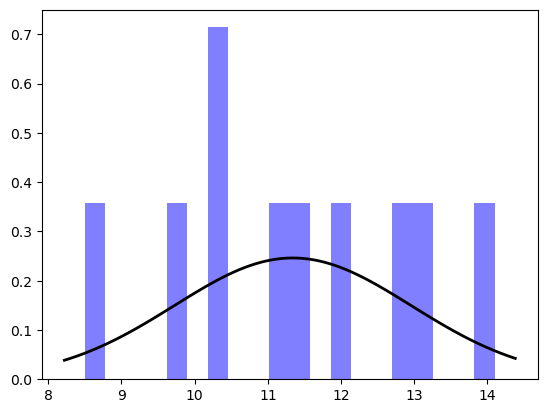

In [15]:
""" encontrar uma distribuição estatística que melhor represente uma lista 
de valores usando Python. Uma abordagem comum para fazer isso é ajustar os dados a 
diferentes distribuições de probabilidade e escolher a distribuição que melhor se ajusta
aos seus dados com base em critérios como o coeficiente de determinação (R²), o teste de 
aderência de Kolmogorov-Smirnov ou o critério de informação Akaike (AIC).

Aqui está um exemplo de como fazer isso usando a biblioteca scipy.stats:
"""
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Suponha que você tenha uma lista de valores 'data'
data = [10.2, 11.5, 12.8, 9.7, 11.2, 14.1, 8.5, 10.3, 13.0, 12.1]

# Ajustar os dados a diferentes distribuições
distributions = [stats.norm, stats.expon, stats.gamma, stats.lognorm]

best_fit = None
best_params = None
best_sse = float('inf')

for distribution in distributions:
    params = distribution.fit(data)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    pdf = distribution.pdf(data, loc=loc, scale=scale, *arg)
    sse = np.sum((pdf - data)**2)
    
    if sse < best_sse:
        best_fit = distribution
        best_params = params
        best_sse = sse

# Agora você tem a melhor distribuição encontrada e seus parâmetros
print("Melhor Distribuição:", best_fit.name)
print("Melhores Parâmetros:", best_params)

# Você pode plotar o histograma dos dados e a PDF da melhor distribuição
plt.hist(data, bins=20, density=True, alpha=0.5, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = best_fit.pdf(x, *best_params)
plt.plot(x, p, 'k', linewidth=2)
plt.show()


In [21]:
# Escreve o df na tabela serv_campo 

df.to_sql('serv_campo', cnx, if_exists='replace', index=False)

cnx.close()